In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

In [46]:
whole_time_period_csv = "Whole time period.csv"

In [47]:
whole_time_period = pd.read_csv(whole_time_period_csv)

In [48]:
whole_time_period.head()

,Unnamed: 0,Parent Name,Area Name,Area Type,Sex,Category,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,0,NaN,England,England,Male,NaN,2017 - 19,15.500000,11145.0,Not compared,Not compared
1,1,NaN,England,England,Male,Most deprived decile (IMD2019),2017 - 19,16.233048,1055.0,Similar,Not compared
2,2,NaN,England,England,Male,Second most deprived decile (IMD2019),2017 - 19,16.681435,735.0,Similar,Not compared
3,3,NaN,England,England,Male,Third more deprived decile (IMD2019),2017 - 19,15.698346,979.0,Similar,Not compared
4,4,NaN,England,England,Male,Fourth more deprived decile (IMD2019),2017 - 19,15.485131,896.0,Similar,Not compared


In [49]:
whole_time_period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1096 non-null   int64  
 1   Parent Name                               960 non-null    object 
 2   Area Name                                 1096 non-null   object 
 3   Area Type                                 1096 non-null   object 
 4   Sex                                       1096 non-null   object 
 5   Category                                  130 non-null    object 
 6   Time period                               1096 non-null   object 
 7   Value                                     1041 non-null   float64
 8   Count                                     1090 non-null   float64
 9   Compared to England value or percentiles  1096 non-null   object 
 10  Compared to Region value or percenti

In [50]:
summary_area=whole_time_period.groupby(["Area Name", "Area Type", "Sex", "Time period"], as_index=False) ["Value"].sum()

In [51]:
summary_area.head()

,Area Name,Area Type,Sex,Time period,Value
0,Barking and Dagenham,Counties & UAs (from Apr 2021),Female,2017 - 19,0.000000
1,Barking and Dagenham,Counties & UAs (from Apr 2021),Female,2019 - 21,3.646866
2,Barking and Dagenham,Counties & UAs (from Apr 2021),Male,2017 - 19,10.785675
3,Barking and Dagenham,Counties & UAs (from Apr 2021),Male,2019 - 21,14.630973
4,Barking and Dagenham,Counties & UAs (from Apr 2021),Persons,2017 - 19,6.066265


In [52]:
region_data = summary_area.loc[(summary_area["Area Type"] == "Region")]
region_data.head()

,Area Name,Area Type,Sex,Time period,Value
234,East Midlands region,Region,Female,2017 - 19,4.649847
235,East Midlands region,Region,Female,2019 - 21,4.655702
236,East Midlands region,Region,Male,2017 - 19,14.633525
237,East Midlands region,Region,Male,2019 - 21,16.327489
238,East Midlands region,Region,Persons,2017 - 19,9.515418


In [53]:
whole_time_period.drop(whole_time_period.loc[whole_time_period['Sex']=="Persons"].index, inplace = True)

In [54]:
whole_time_period.head()

,Unnamed: 0,Parent Name,Area Name,Area Type,Sex,Category,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,0,NaN,England,England,Male,NaN,2017 - 19,15.500000,11145.0,Not compared,Not compared
1,1,NaN,England,England,Male,Most deprived decile (IMD2019),2017 - 19,16.233048,1055.0,Similar,Not compared
2,2,NaN,England,England,Male,Second most deprived decile (IMD2019),2017 - 19,16.681435,735.0,Similar,Not compared
3,3,NaN,England,England,Male,Third more deprived decile (IMD2019),2017 - 19,15.698346,979.0,Similar,Not compared
4,4,NaN,England,England,Male,Fourth more deprived decile (IMD2019),2017 - 19,15.485131,896.0,Similar,Not compared


In [55]:
whole_time_region = whole_time_period.loc[(whole_time_period["Area Type"] == "Region")]
whole_time_region.head()

,Unnamed: 0,Parent Name,Area Name,Area Type,Sex,Category,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
73,73,England,North East region,Region,Male,NaN,2017 - 19,19.098964,642.0,Worse,Not compared
74,74,England,North West region,Region,Male,NaN,2017 - 19,16.650761,1549.0,Worse,Not compared
75,75,England,Yorkshire and the Humber region,Region,Male,NaN,2017 - 19,18.330148,1275.0,Worse,Not compared
76,76,England,East Midlands region,Region,Male,NaN,2017 - 19,14.633525,899.0,Similar,Not compared
77,77,England,West Midlands region,Region,Male,NaN,2017 - 19,15.841810,1180.0,Similar,Not compared


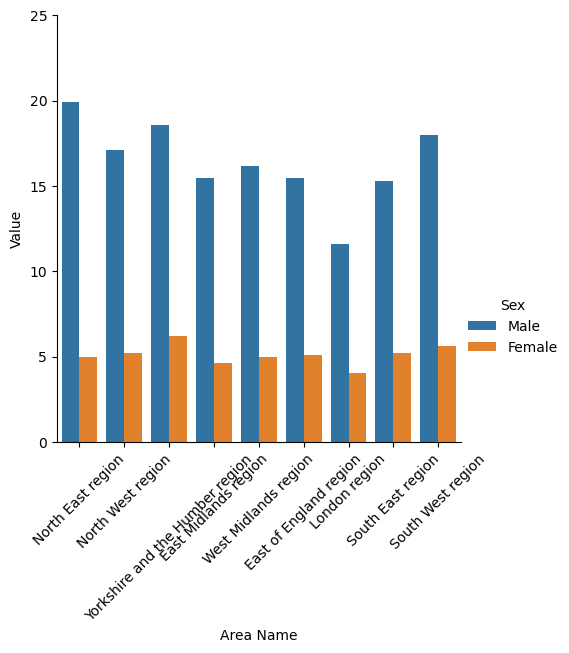

In [102]:
sns.catplot(x = "Area Name",       # x variable name
            y = "Value",       # y variable name
            hue = "Sex",  # group variable name
            data = whole_time_region,     # dataframe to plot
            kind = "bar",
           errorbar= None,
           legend='auto')
plt.xticks(rotation=45)
plt.ylim(0, 25)

plt.show()

In [109]:
time_summary=whole_time_region.groupby(["Sex", "Time period"], as_index=False) ["Count"].sum()

In [110]:
time_summary.set_index('Time period')

,Sex,Count
Time period,,
2017 - 19,Female,3643.0
2019 - 21,Female,3896.0
2017 - 19,Male,11145.0
2019 - 21,Male,11551.0


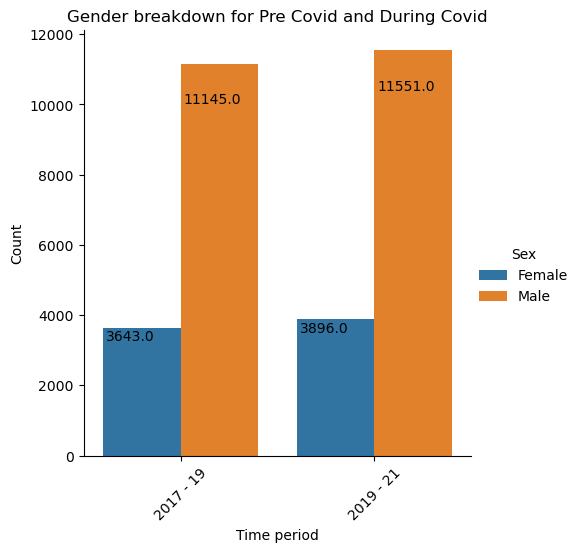

In [116]:
g = sns.catplot(x = "Time period",       # x variable name
            y = "Count",       # y variable name
            hue = "Sex",  # group variable name
            data = time_summary,     # dataframe to plot
            kind = "bar",
           errorbar= None,
           legend='auto'
        )
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 0.90, 
            '{0:.1f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.xticks(rotation=45)
plt.title("Gender breakdown for Pre Covid and During Covid")
plt.show()